# Theory
## Problem Statement:
Recurrent neural network (RNN) Use the Google stock prices dataset and design a time series analysis and prediction system using RNN.

### RNN:
Recurrent Neural Networks (RNNs) are a type of neural network designed for sequential data like text or time series. Unlike regular neural networks, RNNs have an internal memory that allows them to process information from previous inputs and use it to influence their predictions for the current input. This makes them well-suited for tasks like language translation, speech recognition, and time series forecasting.
### Why RNNs for Time Series?
RNNs excel at handling sequential data like stock prices, where the order of information matters. Unlike traditional neural networks, RNNs have internal memory that allows them to process past information and use it to influence future predictions.
### The Google Stock Price Dataset:
The dataset would ideally contain historical Google stock prices, including opening, closing, high, and low prices for each day. This data can be obtained from financial data providers or APIs.
### Using RNNs for Stock Price Prediction:
#### Preprocessing:
- Convert dates into numerical representations (e.g., timestamps).
- Normalize or scale the price data.
#### Model Architecture:
- Input Layer: Size depends on the number of features used (e.g., opening, closing price).
- RNN Layer(s): Processes the sequential price data. Popular RNN architectures include Long Short-Term Memory (LSTM) networks, which are adept at handling long-term dependencies in time series data.
- Dense Layer: Outputs a single value (predicted closing price or price movement).
#### Training and Evaluation:
- Train the RNN model on historical data, feeding past price information to predict future prices.
- Evaluate the model's performance on unseen data using metrics like Mean Squared Error (MSE) or Mean Absolute Error (MAE) to measure the difference between predicted and actual prices

# Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# Data Collection

## Import the data

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,01/03/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,01/04/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,01/05/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,01/06/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,01/09/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
#keras only takes numpy array
training_set = dataset_train.iloc[:, 1: 2].values

In [4]:
training_set.shape

(1509, 1)

## Feature scaling

In [5]:
sc = MinMaxScaler(feature_range = (0, 1))
#fit: get min/max of train data
training_set_scaled = sc.fit_transform(training_set)

## Data structure creation
- Taking the reference of past 60 days of data to predict the future stock price.
- It is observed that taking 60 days of past data gives us best results.
- In this data set 60 days of data means 3 months of data.
- Every month as 20 days of Stock price.iX train will have data of 60 days prior to our date and y train will have data of one day after our date

In [6]:
## 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:
X_train.shape

(1449, 60)

In [8]:
y_train.shape

(1449,)

## Data reshaping

In [9]:
X_train = np.reshape(X_train, newshape = 
                     (X_train.shape[0], X_train.shape[1], 1))

1. Number of stock prices - 1449
2. 
Number of time steps - 6
3. 
Number of Indicator - 1

In [10]:
X_train.shape

(1449, 60, 1)

# Exploratory Data Analysis

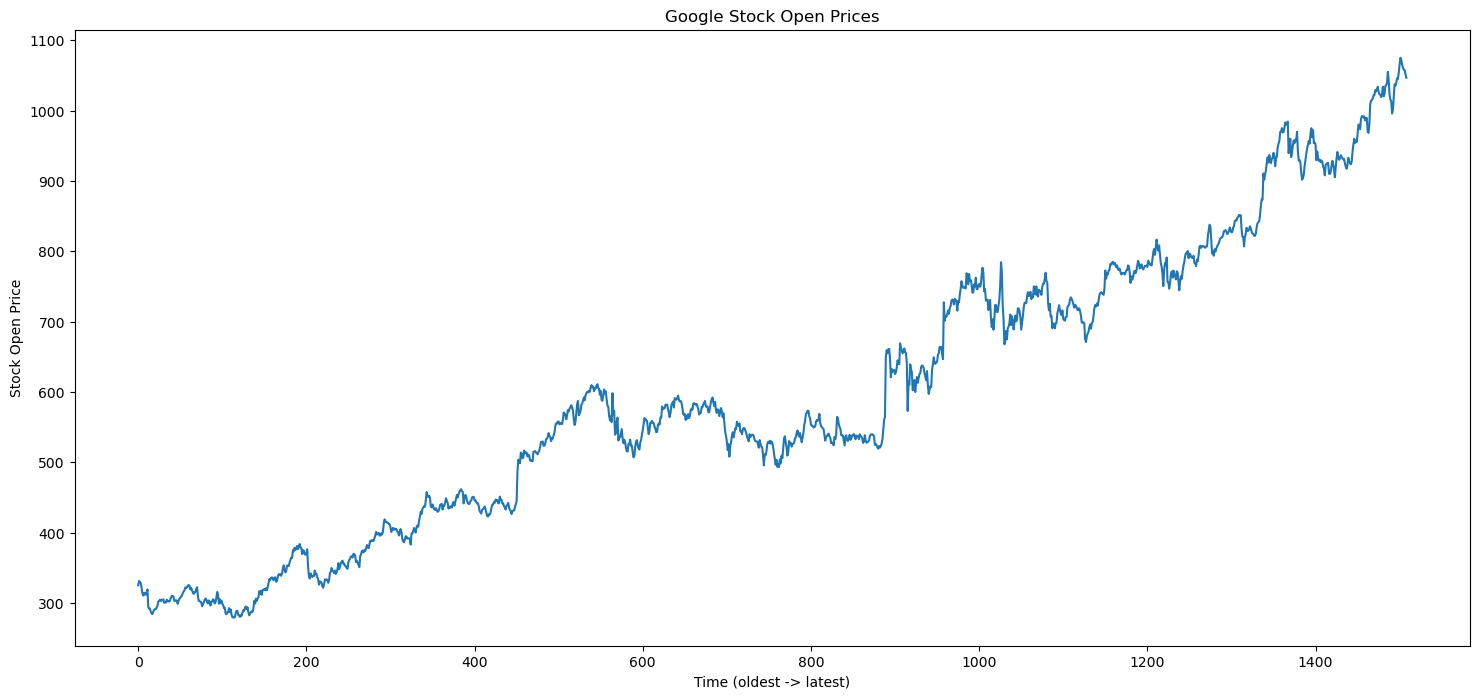

In [11]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Open'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()

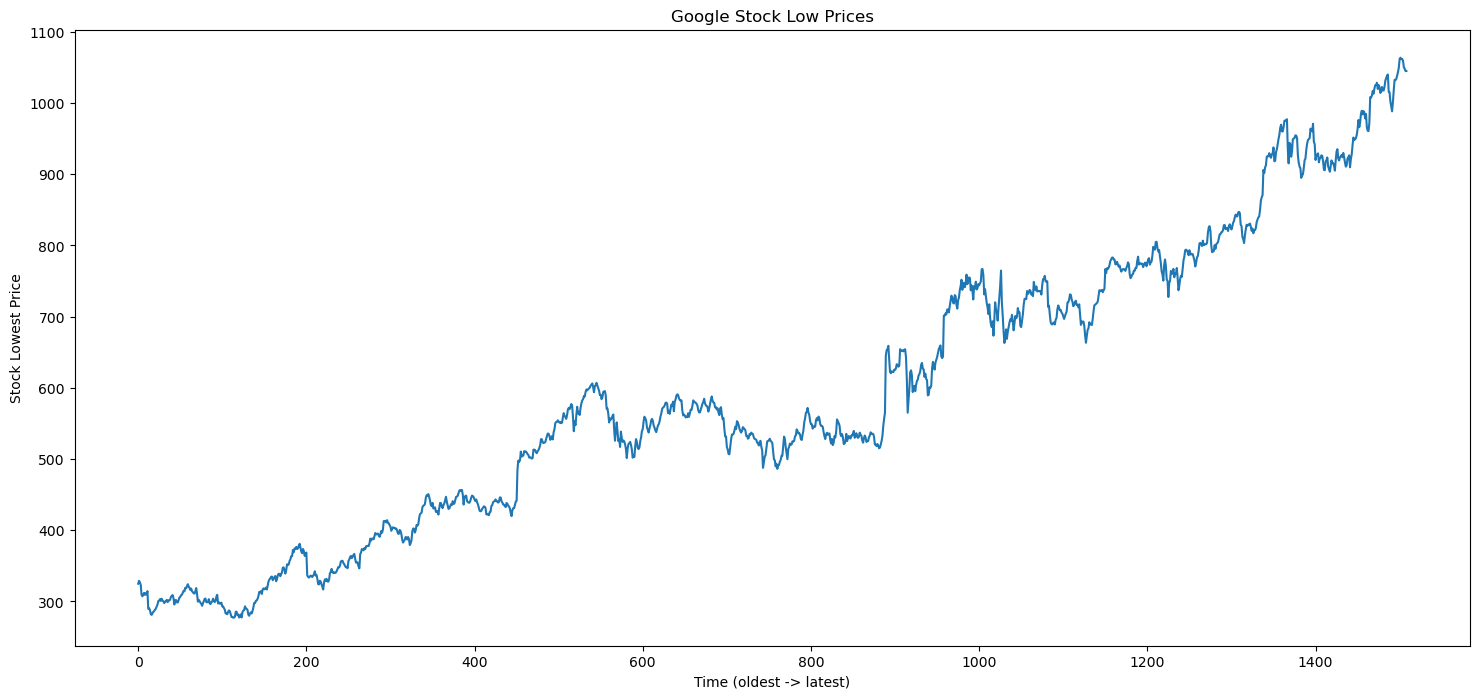

In [12]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Low'])
plt.title("Google Stock Low Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Lowest Price")
plt.show()


# Create & Fit Model

## Create model

In [13]:
regressor = Sequential()
#add 1st lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

##add 2nd lstm layer: 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

##add output layer
regressor.add(Dense(units = 1))

In [14]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Model fit

In [15]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)

Epoch 1/100
46/46 [==============================] - 28s 297ms/step - loss: 0.0247
Epoch 2/100
46/46 [==============================] - 14s 304ms/step - loss: 0.0040
Epoch 3/100
46/46 [==============================] - 12s 263ms/step - loss: 0.0032
Epoch 4/100
46/46 [==============================] - 13s 272ms/step - loss: 0.0035
Epoch 5/100
46/46 [==============================] - 12s 271ms/step - loss: 0.0034
Epoch 6/100
46/46 [==============================] - 12s 270ms/step - loss: 0.0031
Epoch 7/100
46/46 [==============================] - 12s 262ms/step - loss: 0.0031
Epoch 8/100
46/46 [==============================] - 12s 264ms/step - loss: 0.0030
Epoch 9/100
46/46 [==============================] - 12s 269ms/step - loss: 0.0028
Epoch 10/100
46/46 [==============================] - 12s 263ms/step - loss: 0.0027
Epoch 11/100
46/46 [==============================] - 12s 267ms/step - loss: 0.0027
Epoch 12/100
46/46 [==============================] - 12s 266ms/step - loss: 0.0026
E

# Model evaluation

## Read and convert

In [16]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,02/01/2018,1048.339966,1066.939941,1045.229980,1065.000000,1237600
1,03/01/2018,1064.310059,1086.290039,1063.209961,1082.479980,1430200
2,04/01/2018,1088.000000,1093.569946,1084.001953,1086.400024,1004600
3,05/01/2018,1094.000000,1104.250000,1092.000000,1102.229980,1279100
4,08/01/2018,1102.229980,1111.270020,1101.619995,1106.939941,1047600


In [17]:
#keras only takes numpy array
real_stock_price = dataset_test.iloc[:, 1: 2].values
real_stock_price.shape

(125, 1)

## Concat and convert

In [18]:
#vertical concat use 0, horizontal uses 1
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), 
                          axis = 0)
##use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

## Reshape and scale

In [19]:
#reshape data to only have 1 col
inputs = inputs.reshape(-1, 1)

#scale input
inputs = sc.transform(inputs)

In [20]:
len(inputs)

185

## Create test data strucutre

In [21]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#add dimension of indicator
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [22]:
X_test.shape

(125, 60, 1)

# Model prediction

In [24]:
predicted_stock_price = regressor.predict(X_test)

4/4 [==============================] - 0s 39ms/step


In [25]:
#inverse the scaled value
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

## Result visualization

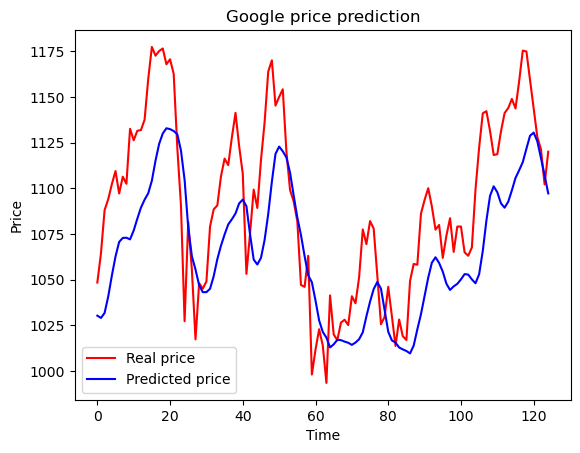

In [26]:
##visualize the prediction and real price
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')

plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()